In [1]:
# Import the gyro project. This module is used to simulate, render, and plot the dynamic system
import gyro

# Create an instance of the gyro simulator
sim = gyro.Gyro_sim(use_keyboard=True)

# Run the simulation
data = sim.run(wheel_vel=0.0)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
PRESS ENTER TO START SIMULATION.
PRESS ESC TO QUIT.
PRESS SPACE TO PAUSE/RESUME SIMULATION.
PRESS BACKSPACE TO RESET SIMULATION.
CONTINUING...
RESET
RESET
RESET
RESET
RESET
RESET
RESET
QUITTING...


In [2]:
# Extract simulation data
import numpy as np

# Extract time and torques
time = data['time']
tauO = data['tauO']
tau2 = data['tau2']
tau1 = data['tau1']

# Create empty lists in which to store the joint data
o_ang = []
o_vel = []
r2_ang = []
r2_vel = []
r1_ang = []
r1_vel = []

# Extract the joint data
for o, r2, r1 in zip(data['outer'], data['r2'], data['r1']):
    o_ang.append(o['position'])
    o_vel.append(o['velocity'])
    r2_ang.append(r2['position'])
    r2_vel.append(r2['velocity'])
    r1_ang.append(r1['position'])
    r1_vel.append(r1['velocity'])

# Format the lists
time = np.array(time)
tauO = np.array(tauO)
tau2 = np.array(tau2)
tau1 = np.array(tau1)
o_ang = np.array(o_ang)
o_vel = np.array(o_vel)
r2_ang = np.array(r2_ang)
r2_vel = np.array(r2_vel)
r1_ang = np.array(r1_ang)
r1_vel = np.array(r1_vel)

In [3]:
# Estimate the acceleration of the joints
dt = time[1]-time[0]
o_acc = np.gradient(o_vel, dt)
r2_acc = np.gradient(r2_vel, dt)
r1_acc = np.gradient(r1_vel, dt)

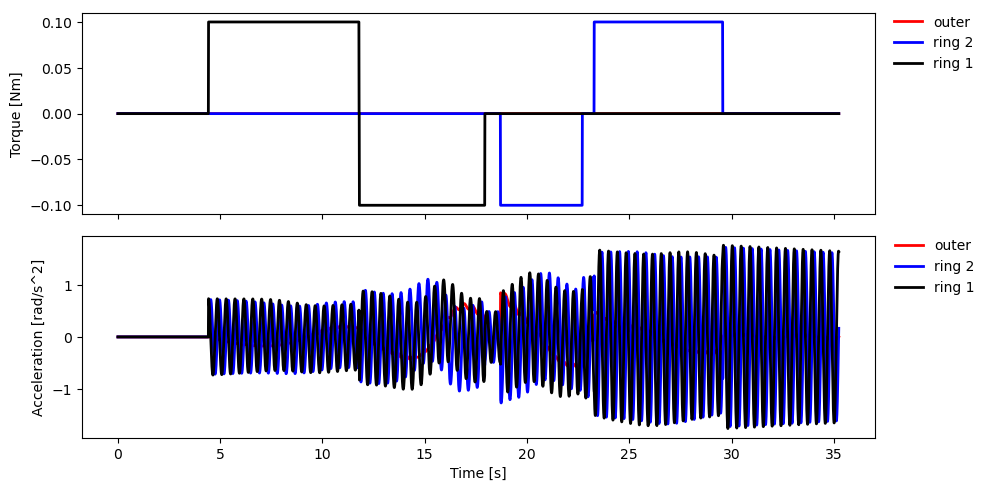

In [4]:
# Plot simulation data
import matplotlib.pyplot as plt

# Create the plot
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,5))

# Plot the torques
axes[0].plot(time, tauO, c='r', lw=2, label='outer')
axes[0].plot(time, tau2, c='b', lw=2, label='ring 2')
axes[0].plot(time, tau1, c='k', lw=2, label='ring 1')
axes[0].set_ylabel("Torque [Nm]")
axes[0].legend(bbox_to_anchor=(1.14, 1.05), frameon=False)

# Plot the accelerations
axes[1].plot(time, o_acc, c='r', lw=2, label='outer')
axes[1].plot(time, r2_acc, c='b', lw=2, label='ring 2')
axes[1].plot(time, r1_acc, c='k', lw=2, label='ring 1')
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Acceleration [rad/s^2]")
axes[1].legend(bbox_to_anchor=(1.01, 1.05), frameon=False)
plt.tight_layout()

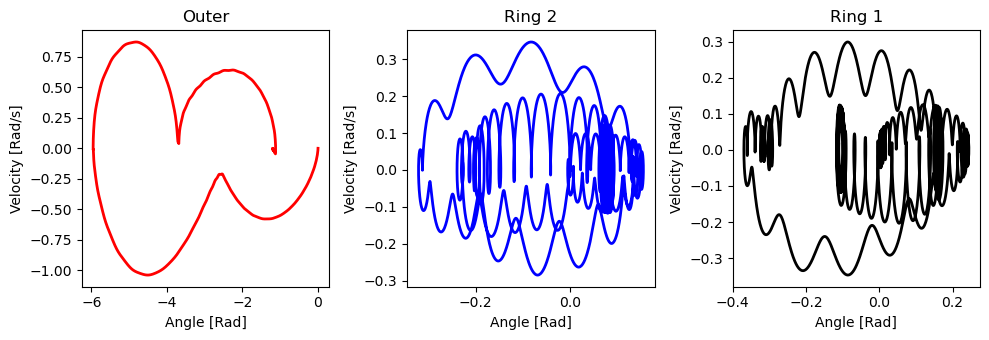

In [5]:
# Create the plot
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10,3.5))

# Plot the outer ring phase diagram
axes[0].plot(o_ang, o_vel, c='r', lw=2)
axes[0].set_xlabel("Angle [Rad]")
axes[0].set_ylabel("Velocity [Rad/s]")
axes[0].set_title("Outer")

# Plot the ring 2 phase diagram
axes[1].plot(r2_ang, r2_vel, c='b', lw=2)
axes[1].set_xlabel("Angle [Rad]")
axes[1].set_ylabel("Velocity [Rad/s]")
axes[1].set_title("Ring 2")

# Plot the ring 1 phase diagram
axes[2].plot(r1_ang, r1_vel, c='k', lw=2)
axes[2].set_xlabel("Angle [Rad]")
axes[2].set_ylabel("Velocity [Rad/s]")
axes[2].set_title("Ring 1")
plt.tight_layout()